In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlp
from matplotlib import rc,rcParams
from dpah import *
%matplotlib inline

In [ ]:
# import matplotlib.pylab as pylab
# params = {'legend.fontsize': 'x-large',
#           'figure.figsize': (15, 5),
#          'axes.labelsize': 'x-large',
#          'axes.titlesize':'35',
#          'xtick.labelsize':'x-large',
#          'ytick.labelsize':'x-large'}
# pylab.rcParams.update(params)

In [ ]:
MAJORITY_COLOR = '#EA3546' #  #4B88A2 #FF5A5F #FF1654 
MINORITY_COLOR = '#0197F6' #  #DE8F6E
color_map = {1: MINORITY_COLOR, 0: MAJORITY_COLOR}

In [ ]:
g28 = DPAH(N=20, 
             fm=0.3, 
             d=0.1,
             plo_M=2.5, 
             plo_m=2.5, 
             h_MM=0.2, 
             h_mm=0.99, 
             verbose=False)

g88 = DPAH(N=20, 
             fm=0.3, 
             d=0.1,
             plo_M=2.5, 
             plo_m=2.5, 
             h_MM=0.8, 
             h_mm=0.99, 
             verbose=False)

g22 = DPAH(N=20, 
             fm=0.3, 
             d=0.1,
             plo_M=2.5, 
             plo_m=2.5, 
             h_MM=0.2, 
             h_mm=0.2, 
             verbose=False)

g82 = DPAH(N=20, 
             fm=0.3, 
             d=0.1,
             plo_M=2.5, 
             plo_m=2.5, 
             h_MM=0.8, 
             h_mm=0.2, 
             verbose=False)

In [ ]:
graphs = [g22, g28, g82, g88]

# titles = [ 
#     '(a) Heterophilic majority / heterophilic minority',
#     '(b) Heterophilic majority / homophilic minority',
#     '(c) Homophilic majority / heterophilic minority',
#     '(d) Homophilic majority / homophilic minority'
# ]

titles = [ 
    '(a) $h_M$ = $h_m$ = 0.2',
    '(b) $h_M$ = 0.2 / $h_m$ = 0.8',
    '(c) $h_M$ = 0.8 / $h_m$ = 0.2',
    '(d) $h_M$ = $h_m$ = 0.8'
]

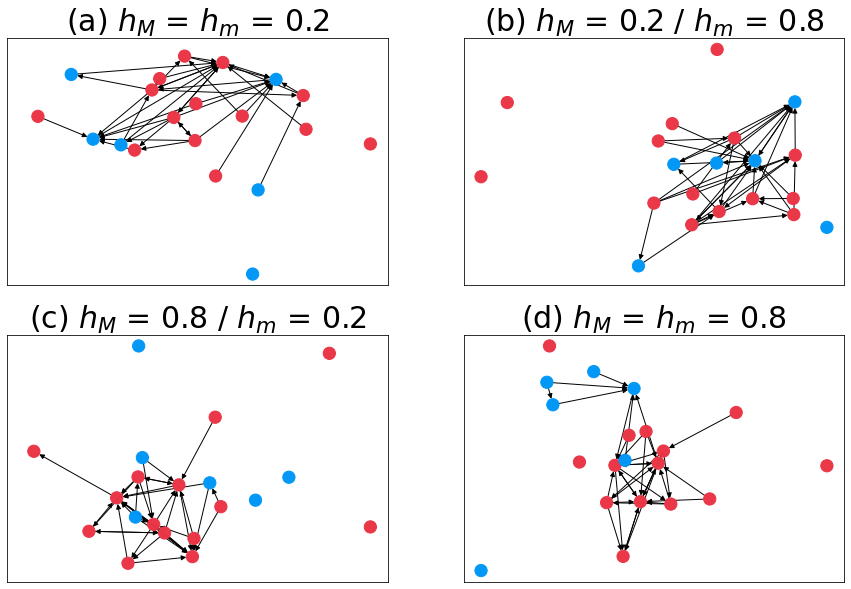

In [ ]:
%matplotlib inline
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
ax = axes.flatten()

for i in range(4):

    class_labels = nx.get_node_attributes(graphs[i], 'm')

    nx.draw_networkx(
        G=graphs[i],
        pos=nx.spring_layout(graphs[i], iterations=10, scale=2),
        labels=class_labels,
        with_labels=False,
        alpha=0.99,
        node_size=150,
        arrowsize=10,
        width=1,
        node_color=[color_map[graphs[i].nodes()[node]['m']] for node in graphs[i]],
        ax=ax[i]
    )

    ax[i].set_title(titles[i], fontsize=30)


plt.show()

In [ ]:
# # rc('text', usetex=True)
# # rc('axes', linewidth=2)
# rc('font', weight='bold')
# # rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

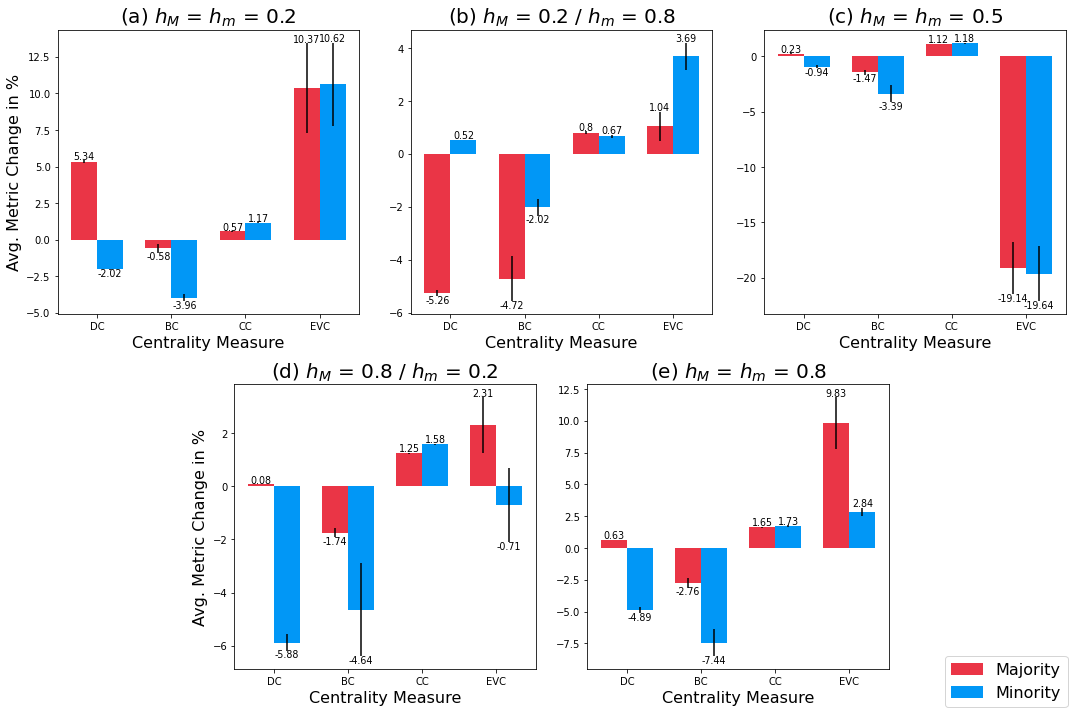

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlp
from matplotlib import rc,rcParams

fig = plt.figure(figsize=(15, 10))
spec = mlp.gridspec.GridSpec(ncols=6, nrows=2) # 6 columns evenly divides both 2 & 3

ax1 = fig.add_subplot(spec[0,0:2]) # row 0 with axes spanning 2 cols on evens
ax2 = fig.add_subplot(spec[0,2:4])
ax3 = fig.add_subplot(spec[0,4:])
ax4 = fig.add_subplot(spec[1,1:3]) # row 0 with axes spanning 2 cols on odds
ax5 = fig.add_subplot(spec[1,3:5])

ax_list = [ax1, ax2, ax3, ax4, ax5]

X = ['DC','BC','CC','EVC']
X_axis = np.arange(len(X))
width = 0.35

titles = [
    '(a) $h_M$ = $h_m$ = 0.2',
    '(b) $h_M$ = 0.2 / $h_m$ = 0.8',
    '(c) $h_M$ = $h_m$ = 0.5',
    '(d) $h_M$ = 0.8 / $h_m$ = 0.2',
    '(e) $h_M$ = $h_m$ = 0.8'   
]
# scenarios > maj, min
data = [
    [
        [[5.34, -0.58, 0.57, 10.37], [-2.02, -3.96, 1.17, 10.62]], # 22
        [[0.09, 0.31, 0.02, 3.07], [0.04, 0.26, 0.04, 2.85]] # stdev
    ],
    [
        [[-5.26,	-4.72, 0.80, 1.04], [0.52, -2.02, 0.67, 3.69]], # 28
        [[0.13, 0.86, 0.05, 0.56], [0.01, 0.31, 0.06, 0.52]] 
    ],
    [
        [[0.23, -1.47, 1.12, -19.14], [-0.94, -3.39, 1.18, -19.64]], # 55
        [[0.03, 0.22, 0.02, 2.36], [0.14, 0.76, 0.05, 2.51]]
    ],
    [
        [[0.08, -1.74, 1.25, 2.31], [-5.88, -4.64, 1.58, -0.71]], # 82
        [[0.00, 0.17, 0.02, 1.05], [0.31, 1.75, 0.03, 1.40]]
    ],
    [
        [[0.63, -2.76, 1.65, 9.83], [-4.89, -7.44, 1.73, 2.84]], # 88
        [[0.03, 0.37, 0.04, 2.03], [0.25, 1.05, 0.07, 0.33]]
    ]
]

for i, ax in enumerate(ax_list):
    
    
    Ymaj = data[i][0][0]
    y_stdev = data[i][1][0]
    y_stdev_labels = [f'({lab})' for lab in y_stdev]

    Zmin = data[i][0][1]
    z_stdev = data[i][1][1]
    z_stdev_labels = [f'({lab})' for lab in z_stdev]

    rects1 = ax.bar(X_axis - width/2, Ymaj, width, label='Majority', color=color_map[0], yerr=y_stdev)
    rects2 = ax.bar(X_axis + width/2, Zmin, width, label='Minority', color=color_map[1], yerr=z_stdev)

    if i == 0 or i == 3:
        ax.set_ylabel("Avg. Metric Change in %", fontsize=16)
    ax.set_xlabel("Centrality Measure", fontsize=16)
    ax.set_title(titles[i], fontsize=20)
    ax.set_xticks(X_axis, X)

    ax.bar_label(rects1, padding=-1, label_type='edge', color='black', fontsize=9.5)
    # ax.bar_label(rects1,labels=y_stdev_labels, padding=-15, fontsize=9, label_type='edge', color='black')

    ax.bar_label(rects2, padding=-1, label_type='edge', color='black', fontsize=9.5)
    # ax.bar_label(rects2,labels=z_stdev_labels, padding=-15, fontsize=9, label_type='edge', color='black')

    fig.tight_layout()

fig.legend(['Majority', 'Minority'], loc='lower right', prop={'size': 16})

plt.show()

In [ ]:
data = [
    [
        [[5.34, -0.58, 0.57, 10.37], [-2.02, -3.96, 1.17, 10.62]], # 22
        [[0.09, 0.31, 0.02, 3.07], [0.04, 0.26, 0.04, 2.85]] # stdev
    ],
    [
        [[-5.26, -4.72, 0.80, 1.04], [0.52, -2.02, 0.67, 3.69]], # 28
        [[0.13, 0.86, 0.05, 0.56], [0.01, 0.31, 0.06, 0.52]] 
    ],
    [
        [[0.23, -1.47, 1.12, -19.14], [-0.94, -3.39, 1.18, -19.64]], # 55
        [[0.03, 0.22, 0.02, 2.36], [0.14, 0.76, 0.05, 2.51]]
    ],
    [
        [[0.08, -1.74, 1.25, 2.31], [-5.88, -4.64, 1.58, -0.71]], # 82
        [[0.00, 0.17, 0.02, 0.92], [0.31, 1.75, 0.03, 1.22]]
    ],
    [
        [[0.63, -2.76, 1.65, 9.83], [-4.89, -7.44, 1.73, 2.84]], # 88
        [[0.03, 0.37, 0.04, 2.03], [0.25, 1.05, 0.07, 0.33]]
    ]
]

data_ix_1 = [
    
    [
        [[-5.23, -3.82, 1.90, 5.27], [1.97, -0.58, 2.05, 7.30]],
        [[0.11, 0.29, 0.04, 1.10], [0.04, 0.21, 0.08, 0.86]]
    ],

    [
        [[-5.21, -4.32, 1.40, 3.35], [0.51, -2.44, 1.20, 5.27]],
        [[0.09, 0.69, 0.04, 0.97], [0.01, 0.34, 0.05, 1.12]]
    ],

    [
        [[0.35, -1.53, 2.13, -17.18], [-1.45, -4.91, 2.29, -18.03]],
        [[0.03, 0.22, 0.05, 2.46], [0.11, 0.86, 0.05, 2.46]]
    ],

    [
        [[0.07, -2.16, 2.25, -8.04], [-5.29, -6.49, 2.80, -11.53]],
        [[0.01, 0.26, 0.03, 4.76], [0.49, 1.71, 0.06, 4.68]]
    ],

    [
        [[0.69, -3.42, 2.55, -0.38], [-5.31, -9.27, 2.71, -8.33]],
        [[0.02, 0.26, 0.04, 2.08], [0.14, 0.59, 0.03, 2.09]]
    ]
    
]


## IX 1 - Effective

In [ ]:
data_ix_1_e = [

    data[0],
    data_ix_1[0],

    data[1],
    data_ix_1[1],

    data[3],
    data_ix_1[3]

]

titles_ix_1_e = [

    '(a) $h_M$ = $h_m$ = 0.2',
    '$h_M$ = $h_m$ = 0.2 (Intervention I)',

    '(b) $h_M$ = 0.2 / $h_m$ = 0.8',
    '$h_M$ = 0.2 / $h_m$ = 0.8 (Intervention I)',

    '(c) $h_M$ = 0.8 / $h_m$ = 0.2',
    '$h_M$ = 0.8 / $h_m$ = 0.2 (Intervention I)'
]


In [ ]:
X = ['DC','BC','CC','EVC']
X_axis = np.arange(len(X))
width = 0.35
num_scenarios = 3

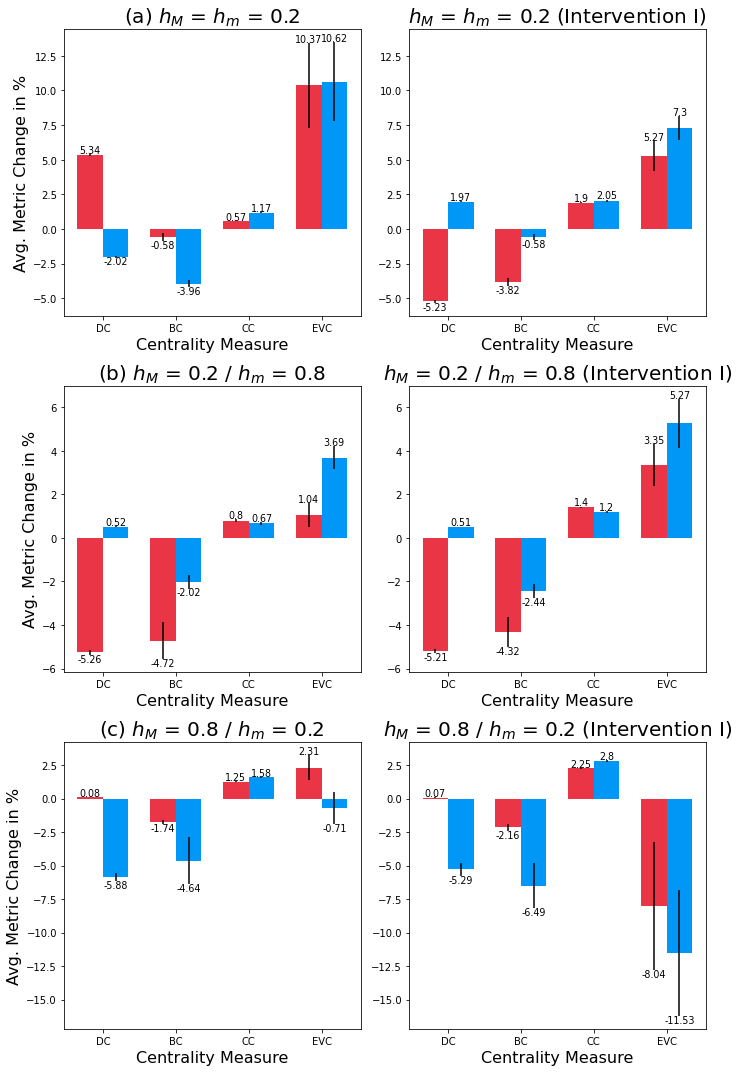

In [ ]:
fig, axes = plt.subplots(nrows=num_scenarios, ncols=2, figsize=(10, num_scenarios*5))
ax = axes.flatten()

for i in range(num_scenarios*2):

    Ymaj = data_ix_1_e[i][0][0]
    y_stdev = data_ix_1_e[i][1][0]

    Zmin = data_ix_1_e[i][0][1]
    z_stdev = data_ix_1_e[i][1][1]

    rects1 = ax[i].bar(X_axis - width/2, Ymaj, width, label='Majority', color=color_map[0], yerr=y_stdev)
    rects2 = ax[i].bar(X_axis + width/2, Zmin, width, label='Minority', color=color_map[1], yerr=z_stdev)

    if i % 2 == 0:
        ax[i].set_ylabel("Avg. Metric Change in %", fontsize=16)
    ax[i].set_xlabel("Centrality Measure", fontsize=16)
    ax[i].set_title(titles_ix_1_e[i], fontsize=20)
    ax[i].set_xticks(X_axis, X)
    if i % 2 == 0:
        ax[i].sharey(ax[i+1])
    ax[i].bar_label(rects1, padding=-1, label_type='edge', color='black', fontsize=9.5)
    ax[i].bar_label(rects2, padding=-1, label_type='edge', color='black', fontsize=9.5)


    fig.tight_layout()
 
# fig.legend(['Majority', 'Minority'], loc='lower right', 
            # prop={'size': 16}
            # )
# plt.legend()

plt.show()

## IX 1 - Ineffective

In [ ]:
titles_ix_1_ie = [

    '(a) $h_M$ = $h_m$ = 0.5',
    '$h_M$ = $h_m$ = 0.5 (Intervention I)',

    '(b) $h_M$ = $h_m$ = 0.8',
    '$h_M$ = $h_m$ = 0.8 (Intervention I)'
]

data_ix_1_ie = [

    data[2],
    data_ix_1[2],

    data[4],
    data_ix_1[4]

]

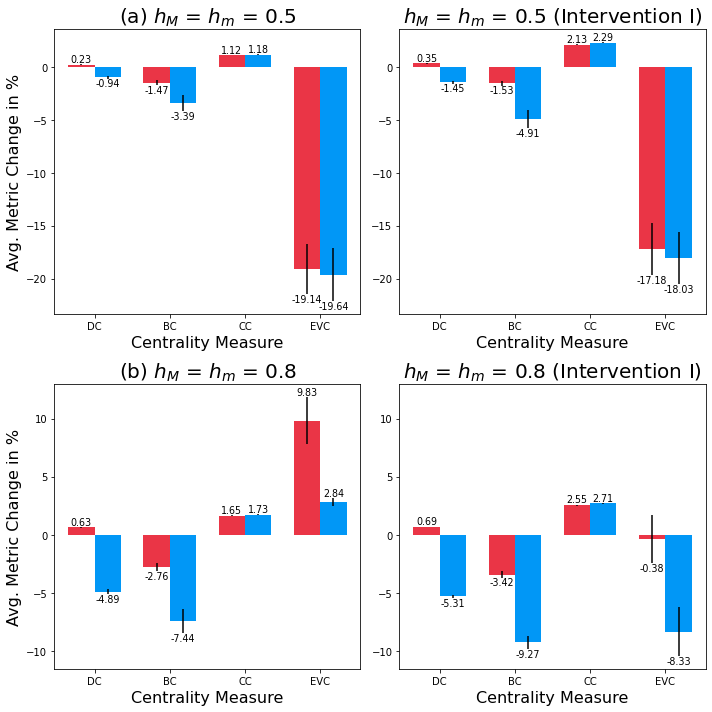

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax = axes.flatten()

for i in range(4):

    Ymaj = data_ix_1_ie[i][0][0]
    y_stdev = data_ix_1_ie[i][1][0]

    Zmin = data_ix_1_ie[i][0][1]
    z_stdev = data_ix_1_ie[i][1][1]

    rects1 = ax[i].bar(X_axis - width/2, Ymaj, width, label='Majority', color=color_map[0], yerr=y_stdev)
    rects2 = ax[i].bar(X_axis + width/2, Zmin, width, label='Minority', color=color_map[1], yerr=z_stdev)

    if i % 2 == 0:
        ax[i].set_ylabel("Avg. Metric Change in %", fontsize=16)
    ax[i].set_xlabel("Centrality Measure", fontsize=16)
    ax[i].set_title(titles_ix_1_ie[i], fontsize=20)
    ax[i].set_xticks(X_axis, X)
    if i % 2 == 0:
        ax[i].sharey(ax[i+1])
    ax[i].bar_label(rects1, padding=0, label_type='edge', color='black', fontsize=9.5)
    ax[i].bar_label(rects2, padding=0, label_type='edge', color='black', fontsize=9.5)


    fig.tight_layout()
 
# fig.legend(['Majority', 'Minority'], loc='lower right', 
            # prop={'size': 16}
            # )
# plt.legend()

plt.show()

In [ ]:
# scenarios > maj, min
data_ix_2 = [
    
    [
        [[2.01, -1.23, 0.95, 3.58], [-0.75, -1.05, 1.44, 4.38]],
        [[0.20,	0.24, 0.04,	2.19], [0.07, 0.35,	0.07, 2.31]]
    ],

    [
        [[-5.20, -2.90,	1.84, 3.08], [0.51, -2.63, 1.62, 4.58]],
        [[0.22,	1.72, 0.02, 0.71], [0.02, 0.55,	0.05, 0.85]]
    ],

    [
        [[0.12, -1.30, 0.76, -14.57], [-0.49, -2.96, 0.79, -14.95]],
        [[0.06, 0.21, 0.01, 2.17], [0.25, 0.58, 0.06, 2.04]]
    ],

    [
        [[0.06, -1.50, 0.95, -13.50], [-4.86, -4.95, 1.18, -14.93]],
        [[0.01, 0.12, 0.03, 2.43], [0.69, 0.91, 0.02, 2.13]]
    ],

    [
        [[0.47, -1.89, 0.99, -2.06], [-2.66, -4.68, 1.03, -4.56]],
        [[0.02, 0.20, 0.04, 1.63], [0.18, 0.59, 0.02, 1.05]]
    ]

]

## IX 2 - Effective

In [ ]:
data_ix_2_e = [

    data[0],
    data_ix_2[0],

    data[1],
    data_ix_2[1],

    data[3],
    data_ix_2[3],

    data[4],
    data_ix_2[4]

]

In [ ]:
titles_ix_2_e = [

    '(a) $h_M$ = $h_m$ = 0.2',
    '$h_M$ = $h_m$ = 0.2 (Intervention II)',

    '(b) $h_M$ = 0.2 / $h_m$ = 0.8',
    '$h_M$ = 0.2 / $h_m$ = 0.8 (Intervention II)',

    '(c) $h_M$ = 0.8 / $h_m$ = 0.2',
    '$h_M$ = 0.8 / $h_m$ = 0.2 (Intervention II)',

    '(d) $h_M$ = $h_m$ = 0.8',
    '$h_M$ = $h_m$ = 0.8 (Intervention II)'
]

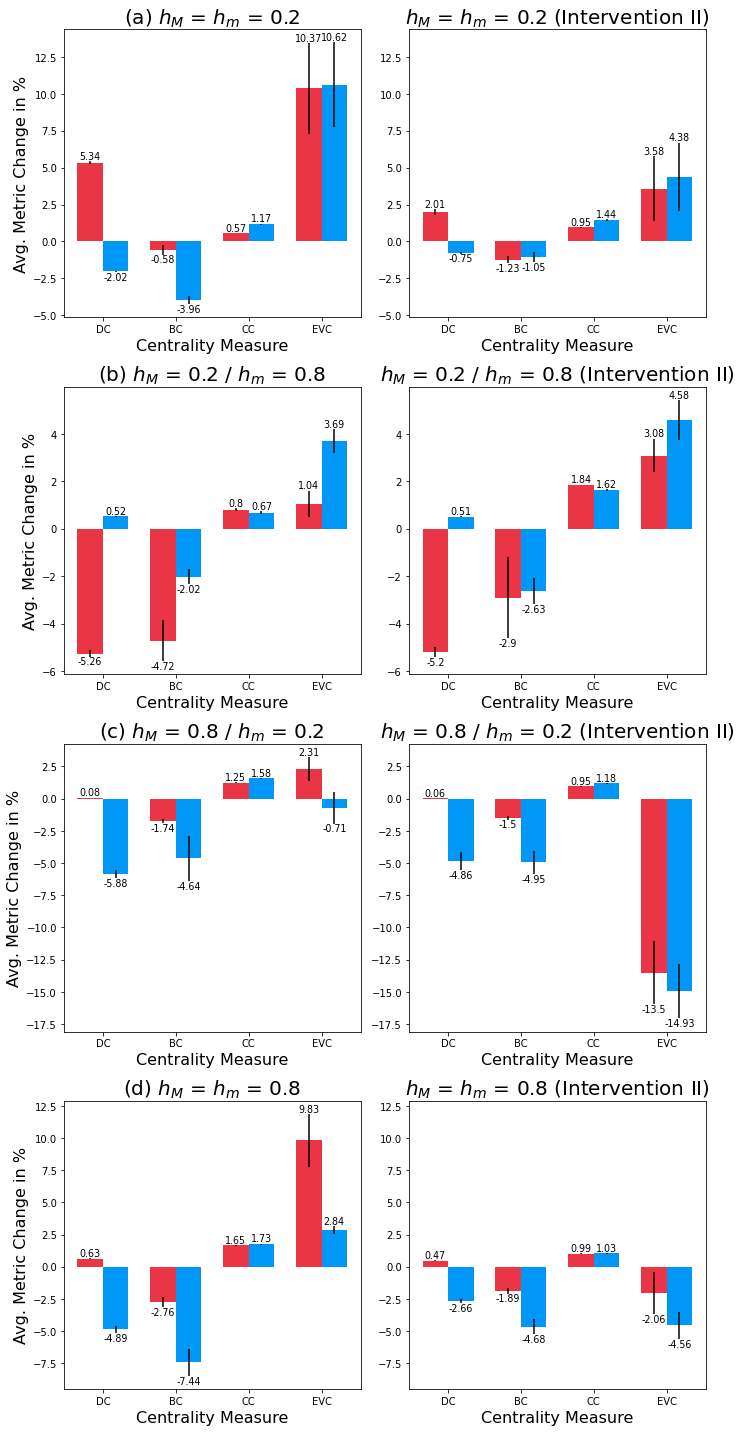

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 20))
ax = axes.flatten()

for i in range(8):

    Ymaj = data_ix_2_e[i][0][0]
    y_stdev = data_ix_2_e[i][1][0]

    Zmin = data_ix_2_e[i][0][1]
    z_stdev = data_ix_2_e[i][1][1]

    rects1 = ax[i].bar(X_axis - width/2, Ymaj, width, label='Majority', color=color_map[0], yerr=y_stdev)
    rects2 = ax[i].bar(X_axis + width/2, Zmin, width, label='Minority', color=color_map[1], yerr=z_stdev)

    if i % 2 == 0:
        ax[i].set_ylabel("Avg. Metric Change in %", fontsize=16)
    ax[i].set_xlabel("Centrality Measure", fontsize=16)
    ax[i].set_title(titles_ix_2_e[i], fontsize=20)
    ax[i].set_xticks(X_axis, X)
    if i % 2 == 0:
        ax[i].sharey(ax[i+1])
    ax[i].bar_label(rects1, padding=0, label_type='edge', color='black', fontsize=9.5)
    ax[i].bar_label(rects2, padding=0, label_type='edge', color='black', fontsize=9.5)


    fig.tight_layout()
 
# fig.legend(['Majority', 'Minority'], loc='lower right', 
            # prop={'size': 16}
            # )
# plt.legend()

plt.show()

## IX 2 - Ineffective

In [ ]:
data_ix_2_ie = [

    data[2],
    data_ix_2[2]

]

titles_ix_2_ie = [

    '(a) $h_M$ = $h_m$ = 0.5',
    '$h_M$ = $h_m$ = 0.5 (Intervention II)'

]

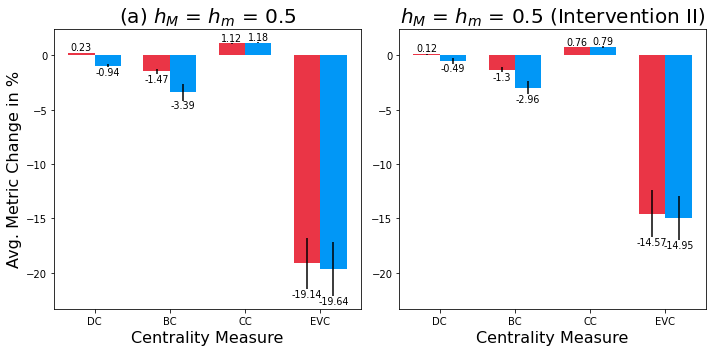

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax = axes.flatten()

for i in range(2):

    Ymaj = data_ix_2_ie[i][0][0]
    y_stdev = data_ix_2_ie[i][1][0]

    Zmin = data_ix_2_ie[i][0][1]
    z_stdev = data_ix_2_ie[i][1][1]

    rects1 = ax[i].bar(X_axis - width/2, Ymaj, width, label='Majority', color=color_map[0], yerr=y_stdev)
    rects2 = ax[i].bar(X_axis + width/2, Zmin, width, label='Minority', color=color_map[1], yerr=z_stdev)

    if i % 2 == 0:
        ax[i].set_ylabel("Avg. Metric Change in %", fontsize=16)
    ax[i].set_xlabel("Centrality Measure", fontsize=16)
    ax[i].set_title(titles_ix_2_ie[i], fontsize=20)
    ax[i].set_xticks(X_axis, X)
    if i % 2 == 0:
        ax[i].sharey(ax[i+1])
    ax[i].bar_label(rects1, padding=0, label_type='edge', color='black', fontsize=9.5)
    ax[i].bar_label(rects2, padding=0, label_type='edge', color='black', fontsize=9.5)


    fig.tight_layout()
 
# fig.legend(['Majority', 'Minority'], loc='lower right', 
            # prop={'size': 16}
            # )
# plt.legend()

plt.show()

## Full IX Results

In [ ]:
data_ix_full_packed = [

    [data[0],
    data_ix_1[0],
    data_ix_2[0]],

    [data[1],
    data_ix_1[1],
    data_ix_2[1]],

    [data[2],
    data_ix_1[2],
    data_ix_2[2]],

    [data[3],
    data_ix_1[3],
    data_ix_2[3]],

    [data[4],
    data_ix_1[4],
    data_ix_2[4]],

]

data_ix_full = [

    data[0],
    data_ix_1[0],
    data_ix_2[0],

    data[1],
    data_ix_1[1],
    data_ix_2[1],

    data[2],
    data_ix_1[2],
    data_ix_2[2],

    data[3],
    data_ix_1[3],
    data_ix_2[3],

    data[4],
    data_ix_1[4],
    data_ix_2[4],

]

titles = [
    'Baseline',
    'kn-Intervention',
    'Authority-based Intervention'
]

titles_ix_full_packed = [ titles for i in range(5) ]

titles_ix_full = [ 
    
    titles * 5

]

row_titles = [

    '(a) $h_M$ = $h_m$ = 0.2',
    '(b) $h_M$ = 0.2 / $h_m$ = 0.8',
    '(c) $h_M$ = $h_m$ = 0.5',
    '(d) $h_M$ = 0.8 / $h_m$ = 0.2',
    '(e) $h_M$ = $h_m$ = 0.8'

]

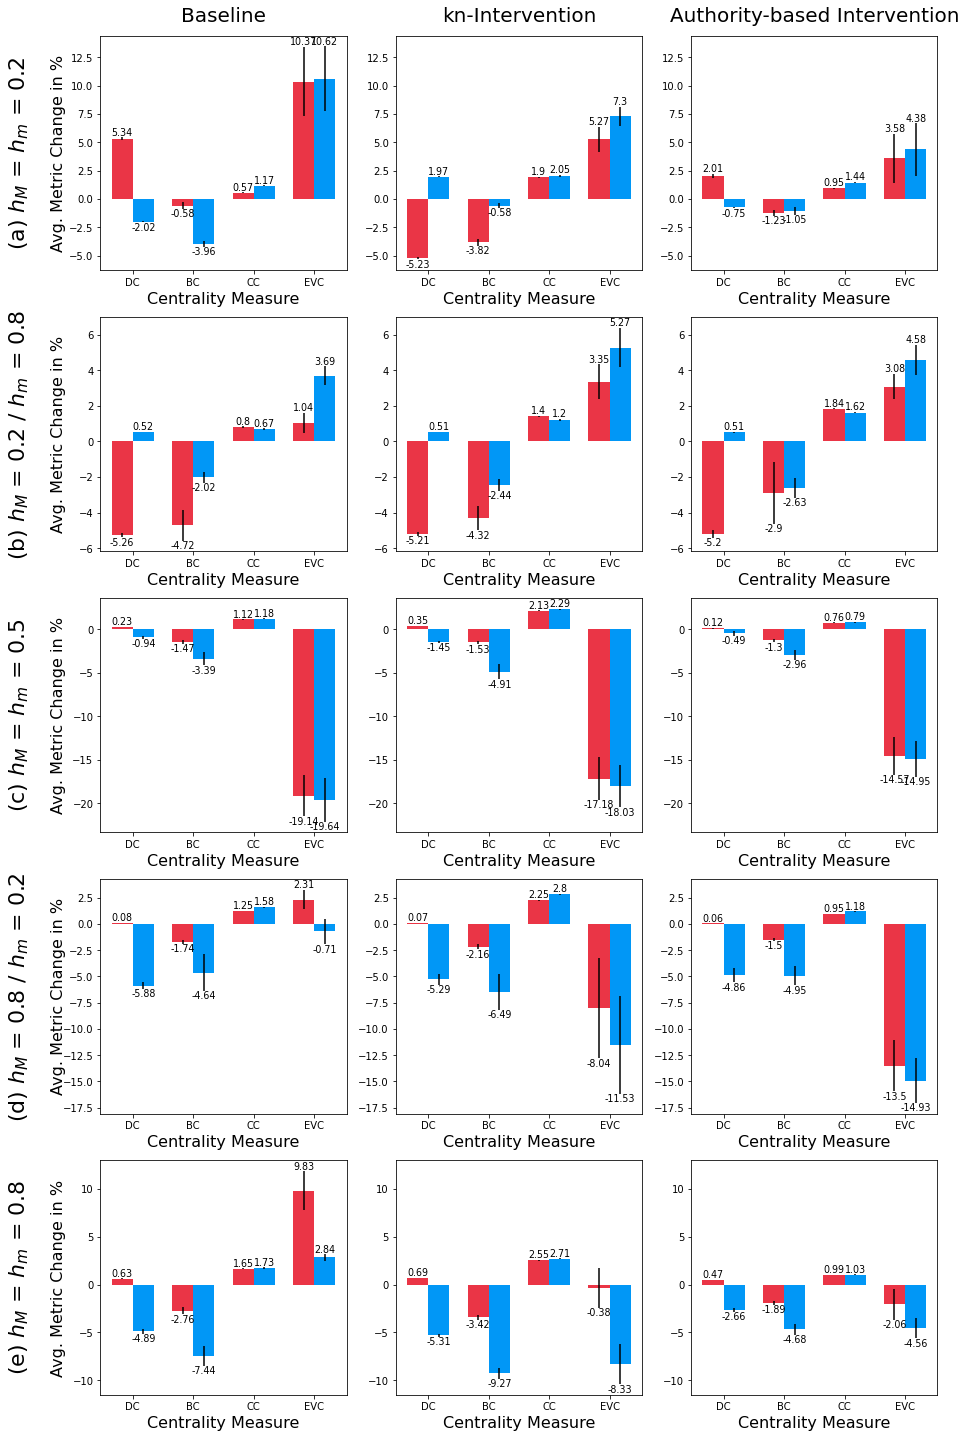

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=3, sharex=False, sharey=False, figsize=(15, 25))
ax = axes.flatten()

for i in range(len(ax)):

    Ymaj = data_ix_full[i][0][0]
    y_stdev = data_ix_full[i][1][0]

    Zmin = data_ix_full[i][0][1]
    z_stdev = data_ix_full[i][1][1]

    rects1 = ax[i].bar(X_axis - width/2, Ymaj, width, label='Majority', color=color_map[0], yerr=y_stdev)
    rects2 = ax[i].bar(X_axis + width/2, Zmin, width, label='Minority', color=color_map[1], yerr=z_stdev)

    if i % 3 == 0:
        ax[i].set_ylabel("Avg. Metric Change in %", fontsize=16)
        ax[i].get_yaxis().set_label_coords(-0.14,0.5)
    ax[i].set_xlabel("Centrality Measure", fontsize=16)
    # ax[i].set_title(titles_ix_full[i], fontsize=20)
    ax[i].set_xticks(X_axis, X)
    if i % 3 == 0 and i < 14:
        ax[i].sharey(ax[i+1])
        ax[i+1].sharey(ax[i+2])
    ax[i].bar_label(rects1, padding=0, label_type='edge', color='black', fontsize=9.5)
    ax[i].bar_label(rects2, padding=0, label_type='edge', color='black', fontsize=9.5)

for ax, col in zip(axes[0,:], titles):
    ax.annotate(col, (0.5, 1), xytext=(0, 10), ha='center', va='bottom',
                size=20, xycoords='axes fraction', textcoords='offset points')

for ax, row in zip(axes[:,0], row_titles):
    ax.annotate(row, (-0.1, 0.5), xytext=(-45, 0), ha='right', va='center',
                size=22, rotation=90, xycoords='axes fraction',
                textcoords='offset points')

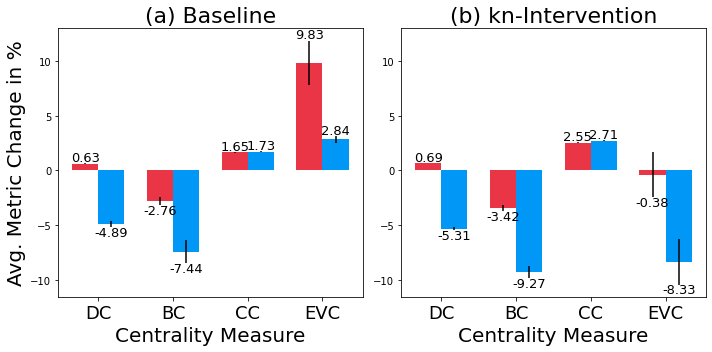

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax = axes.flatten()

# plt.suptitle('$h_M$ = $h_m$ = 0.8', fontsize=20)

data_88 = [
    data[-1],
    data_ix_1[-1]
    # , data_ix_2[-1]
]

titles_88 = [
    '(a) Baseline',
    '(b) kn-Intervention'
    # ,'Intervention II'
]

for i in range(2):

    Ymaj = data_88[i][0][0]
    y_stdev = data_88[i][1][0]

    Zmin = data_88[i][0][1]
    z_stdev = data_88[i][1][1]

    rects1 = ax[i].bar(X_axis - width/2, Ymaj, width, label='Majority', color=color_map[0], yerr=y_stdev)
    rects2 = ax[i].bar(X_axis + width/2, Zmin, width, label='Minority', color=color_map[1], yerr=z_stdev)

    if i == 0:
        ax[i].set_ylabel("Avg. Metric Change in %", fontsize=20)
    ax[i].set_xlabel("Centrality Measure", fontsize=20)
    ax[i].set_title(titles_88[i], fontsize=22)
    ax[i].set_xticks(X_axis, X, fontsize=18)
    # ax[i].set_yticks(fontsize=18)
    if i == 0:
        ax[i].sharey(ax[i+1])
        # ax[i+1].sharey(ax[i+2])
    ax[i].bar_label(rects1, padding=-1, label_type='edge', color='black', fontsize=13)
    ax[i].bar_label(rects2, padding=-1, label_type='edge', color='black', fontsize=13)

    # if i == 2:
    #     ax[i].legend(loc='upper right',  prop={'size': 12})

    fig.tight_layout()

row_title_88 = ['$h_M$ = $h_m$ = 0.8']

# for ax, row in zip(axes[:], row_title_88):
#     ax.annotate(row, (-0.1, 0.5), xytext=(-45, 0), ha='right', va='center',
#                 size=24, rotation=90, xycoords='axes fraction',
#                 textcoords='offset points')
 
# fig.legend(['Majority', 'Minority'], loc='lower right', 
            # prop={'size': 16}
            # )
# plt.legend()

plt.show()

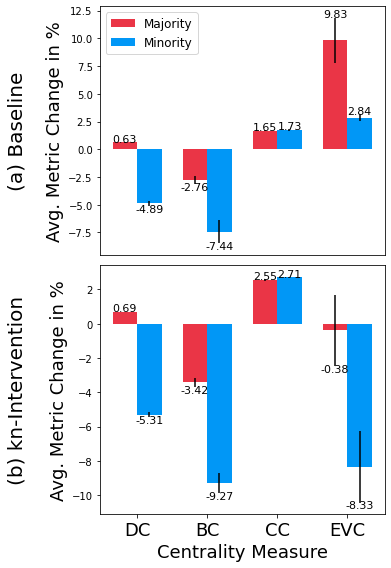

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 8))
ax = axes.flatten()

# plt.suptitle('$h_M$ = $h_m$ = 0.8', fontsize=20)

data_88 = [
    data[-1],
    data_ix_1[-1]
    # , data_ix_2[-1]
]

titles_88 = [
    'Base',
    'kn-Intervention'
    # ,'Intervention II'
]

for i in range(2):

    Ymaj = data_88[i][0][0]
    y_stdev = data_88[i][1][0]

    Zmin = data_88[i][0][1]
    z_stdev = data_88[i][1][1]

    rects1 = ax[i].bar(X_axis - width/2, Ymaj, width, label='Majority', color=color_map[0], yerr=y_stdev)
    rects2 = ax[i].bar(X_axis + width/2, Zmin, width, label='Minority', color=color_map[1], yerr=z_stdev)

    
    ax[i].set_ylabel("Avg. Metric Change in %", fontsize=18)

    if i == 1:
        ax[i].set_xlabel("Centrality Measure", fontsize=18)
    # ax[i].set_title(titles_88[i], fontsize=24)

    # if i == 1:
    ax[i].set_xticks(X_axis, X, fontsize=18)
    if i == 0:
        ax[i].sharex(ax[i+1])
        ax[i].tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False) # labels along the bottom edge are off
        # ax[i+1].sharey(ax[i+2])
    ax[i].bar_label(rects1, padding=-2, label_type='edge', color='black', fontsize=11)
    ax[i].bar_label(rects2, padding=-2, label_type='edge', color='black', fontsize=11)

    if i == 0:
        ax[i].legend(loc='upper left',  prop={'size': 12})

    fig.tight_layout()

row_title_88 = ['(a) Baseline', '(b) kn-Intervention']

for ax, row in zip(axes[:], row_title_88):
    ax.annotate(row, (-0.1, 0.5), xytext=(-45, 0), ha='right', va='center',
                size=20, rotation=90, xycoords='axes fraction',
                textcoords='offset points')
 
# fig.legend(['Majority', 'Minority'], loc='lower right', 
            # prop={'size': 16}
            # )
# plt.legend()

plt.show()

## Empirical Data

In [ ]:
data_hate = [

    [
        [[-1.83, 5.51, 1.18, -15.69], [3.37, 13.55, 1.67, -15.01]],
        [[0.18, 3.36, 0.02, 5.52], [0.33, 5.45, 0.03, 5.31]]
    ]

]

data_hate_ix_1 = [

    [
        [[-2.71, -1.35, 1.32, -12.84], [4.97, 13.37, 1.47, -10.36]],
        [[0.21, 3.39, 0.01, 2.57], [0.38, 2.49, 0.04, 2.21]]
    ]

]


data_hate_ix_2 = [

    [
        [[-3.13, -7.64, 1.22, -14.32], [5.75, 16.32, 1.24, -12.04]],
        [[0.22, 4.56, 0.03, 4.57], [0.41, 4.49, 0.04, 4.81]]
    ]

]

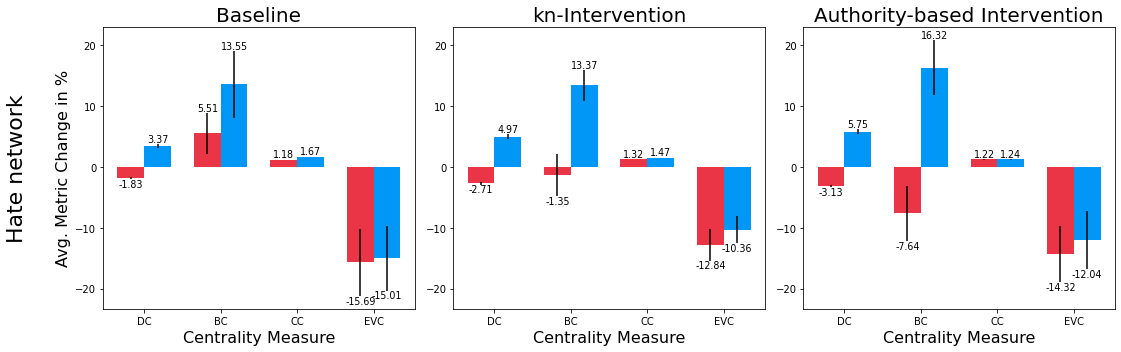

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax = axes.flatten()

# plt.suptitle('$h_M$ = $h_m$ = 0.8', fontsize=20)

data_hate_plot = [
    data_hate[0],
    data_hate_ix_1[0],
    data_hate_ix_2[0]
]

titles = [
    'Baseline',
    'kn-Intervention',
    'Authority-based Intervention'
]

for i in range(3):

    Ymaj = data_hate_plot[i][0][0]
    y_stdev = data_hate_plot[i][1][0]

    Zmin = data_hate_plot[i][0][1]
    z_stdev = data_hate_plot[i][1][1]

    rects1 = ax[i].bar(X_axis - width/2, Ymaj, width, label='Majority', color=color_map[0], yerr=y_stdev)
    rects2 = ax[i].bar(X_axis + width/2, Zmin, width, label='Minority', color=color_map[1], yerr=z_stdev)

    if i == 0:
        ax[i].set_ylabel("Avg. Metric Change in %", fontsize=16)
    ax[i].set_xlabel("Centrality Measure", fontsize=16)
    ax[i].set_title(titles[i], fontsize=20)
    ax[i].set_xticks(X_axis, X)
    if i == 0:
        ax[i].sharey(ax[i+1])
        ax[i+1].sharey(ax[i+2])
    ax[i].bar_label(rects1, padding=0, label_type='edge', color='black', fontsize=9.5)
    ax[i].bar_label(rects2, padding=0, label_type='edge', color='black', fontsize=9.5)


    fig.tight_layout()

row_title = ['Hate network']

for ax, row in zip(axes[:], row_title):
    ax.annotate(row, (-0.1, 0.5), xytext=(-45, 0), ha='right', va='center',
                size=22, rotation=90, xycoords='axes fraction',
                textcoords='offset points')
 
# fig.legend(['Majority', 'Minority'], loc='lower right', 
            # prop={'size': 16}
            # )
# plt.legend()

plt.show()

In [ ]:

data_blogs = [

    [
        [[0.03, -0.45, 0.07, 1.34], [0.18, -1.29, -0.08, 2.76]],
        [[0.13, 0.77, 0.16, 2.84], [0.19, 1.41, 0.12, 1.97]]
    ]

]


data_blogs_ix_1 = [

    [
        [[-0.35, -0.87, 0.57, -1.56], [0.71, -0.56, 0.55, 2.19]],
        [[0.13, 0.73, 0.34, 2.29], [0.23, 0.93, 0.24, 1.23]]
    ]

]


data_blogs_ix_2 = [

    [
        [[-0.14, -0.31, 0.11, 0.03], [0.42, -0.37, 0.03, 1.91]],
        [[0.09, 0.73, 0.29, 2.14], [0.19, 1.09, 0.13, 1.41]]
    ]

]

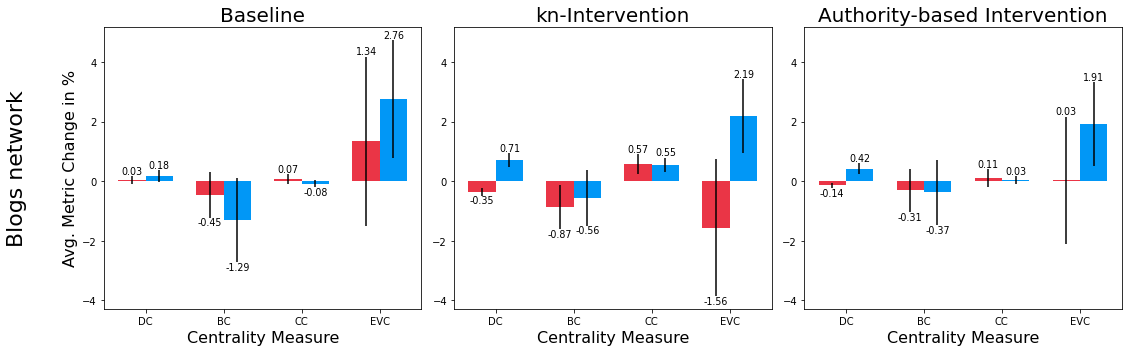

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax = axes.flatten()

# plt.suptitle('$h_M$ = $h_m$ = 0.8', fontsize=20)

data_blogs_plot = [
    data_blogs[0],
    data_blogs_ix_1[0],
    data_blogs_ix_2[0]
]

titles = [
    'Baseline',
    'kn-Intervention',
    'Authority-based Intervention'
]

for i in range(3):

    Ymaj = data_blogs_plot[i][0][0]
    y_stdev = data_blogs_plot[i][1][0]

    Zmin = data_blogs_plot[i][0][1]
    z_stdev = data_blogs_plot[i][1][1]

    rects1 = ax[i].bar(X_axis - width/2, Ymaj, width, label='Majority', color=color_map[0], yerr=y_stdev)
    rects2 = ax[i].bar(X_axis + width/2, Zmin, width, label='Minority', color=color_map[1], yerr=z_stdev)

    if i == 0:
        ax[i].set_ylabel("Avg. Metric Change in %", fontsize=16)
    ax[i].set_xlabel("Centrality Measure", fontsize=16)
    ax[i].set_title(titles[i], fontsize=20)
    ax[i].set_xticks(X_axis, X)
    if i == 0:
        ax[i].sharey(ax[i+1])
        ax[i+1].sharey(ax[i+2])
    ax[i].bar_label(rects1, padding=0, label_type='edge', color='black', fontsize=9.5)
    ax[i].bar_label(rects2, padding=0, label_type='edge', color='black', fontsize=9.5)


    fig.tight_layout()

row_title = ['Blogs network']

for ax, row in zip(axes[:], row_title):
    ax.annotate(row, (-0.1, 0.5), xytext=(-45, 0), ha='right', va='center',
                size=22, rotation=90, xycoords='axes fraction',
                textcoords='offset points')
 
# fig.legend(['Majority', 'Minority'], loc='lower right', 
            # prop={'size': 16}
            # )
# plt.legend()

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dc7e1387-1812-4968-87b7-44e62b0a7f61' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>